# 1 Boyutlu Isı Transferinin Modellenmesi

Batarya ve bilgisayar teknolojilerinden, evde kullandığımız ısıtma/soğutma cihazlarına kadar birçok mühendislik ürününün geliştirilmesinde ısıl analizler oldukça önemlidir. Son yıllarda uygulamalardaki geometriler karmaşıklaşmış ve numerik yöntemlere olan ihtiyaç artmıştır. Bu motivasyonla bu derste basit bir kanat kesiti üzerinden 1 boyutlu ısı transferini sonlu elemanlar metodu ile inceleyeceğiz.

## Isı Denklemi

En genel haliyle ısı denklemi

$$ \nabla \cdot k \nabla{T} +\dot{q} +\phi = \rho c_v \frac{DT}{Dt} \tag{1} $$

şeklindedir. Burada $T$ sıcaklık vektörünü, $k$ ısıl iletkenlik katsayısını, $\rho$ yoğunluğu ve $c_v$ sabit hacimde ısı kapasitesini belirtmektedir. Denklemi terim terim inceleyecek olursak:

- Sol taraftaki 1. terim ısının iletimini
- Sol taraftaki 2. terim aktarılan ısıyı
- Sol taraftaki 3. terim viskoz etkileriden dolayı oluşan ısıl kaybı/kazancı
- Sağ taraftaki terim sıcaklığın zamana bağlı değişimini

modeller. 

### 1 Boyutlu Kanatta Isı Transferi

<img src="Resimler/Ders5/Sekil1.png" align="center" width= "600"/>

Şekil 1'de bir bilgisayar işlemcisindeki ısı transfer uygulaması gösterilmiştir. İşlemciler ısı üreten birimler olduğundan bu ısının işlemcilerden uzaklaştırılması gerekmektedir. Bunun için çeşitli uygulamalar mevcuttur. Bunlardan birisi de kanatlı geometrilerle ısı transfer yüzey alanını artırarak işlemciden atılan ısı hızını artırmaktır. Bu uygulamada kanatlardaki ısı dağılımını bilmek, kanat geometrisini ve kullanılacak malzemeyi belirlemek açısından oldukça önemlidir.

Biz bu derste sadece iletim yoluyla gerçekleşen ısı transferinin sürekli halini ele alacağız. O halde Denklem (1)'i yeniden düzenleyelim:

$$\require{cancel}$$  

$$ \nabla \cdot k \nabla{T} +\dot{q} +\cancel{\phi} = \cancel{\rho c_v \frac{DT}{Dt}} \tag{2} $$

Denklem (2)'yi kesit alanını($\dot{Q}=qA$) içerecek şekilde düzenleyip yazarsak:

$$ \nabla \cdot kA \nabla{T} = -\dot{Q}  \tag{3} $$

şeklini alır. Şimdi Denklem (3)'ün zayıf formunu türetebiliriz.

### Zayıf Formun Türetilmesi

Denklem (3)'ü test fonksiyonu $v$ ile çarpıp kanat boyunca($\Omega$) integralini alalım:

$$ \int_0^L (\nabla \cdot (kA \nabla{T}))v d\Omega = \int_0^L (-\dot{Q})v d\Omega  \tag{4} $$

Denklem (4)'ün sol tarafı için [kısmi integrasyon](https://en.wikipedia.org/wiki/Integration_by_parts) uygulayabiliriz:

$$ \int_0^L ( \nabla T kA  \nabla{v})d\Omega = \int_0^L (\dot{Q})v d\Omega -(kA \nabla{T}v)|_0^L  \tag{5} $$

Ayrıca [Fourier'ın ısı iletim denklemini](https://en.wikipedia.org/wiki/Thermal_conduction)($q = -k \nabla{T}$)
Denklem (6)'daki sınır integralleri içindeki terim yerine yazmak için kullanabiliriz. Kanadın işlemci ile temas ettiği yerdeki iletimle ısı transfer hızı $s=-k\nabla{T}|_0$, kanadın ucundaki ısı transfer hızı $g= -k \nabla{T}|_L$ olarak belirtilirse:

$$ \int_0^L ( \nabla T kA  \nabla{v})d\Omega = \int_0^L (\dot{Q})vd\Omega +(Asv)-(Agv)  \tag{6} $$


Artık Denklem (6)'yı kanattaki sıcaklık dağılımını sonlu elemanlar yöntemiyle bulmak için kullanabiliriz. 


## Sonlu Eleman Modeli

$N$'nin baz fonksiyonu olarak tanımlanması halinde sıcaklık vektörü $T \approx \mathbf{N}\mathbf{u}$, dolayısıyla sıcaklık gradyeni $\nabla T \approx \nabla \mathbf{N} \mathbf{u}$ olacaktır. Aynı işlemi test fonksiyonu $v$ için de yaparsak $v \approx \mathbf{N}\mathbf{c}$ ve $\nabla v \approx \nabla \mathbf{N} \mathbf{c}$ denklemlerini elde ederiz. Kesit alanı ve ısıl iletkenlik katsayısını sabit kabul edersek ve tanımladığımız son değişkenleri tekrar denklem (6)'nın içine yazarsak:

$$ \int_0^L kA( \nabla{\mathbf{N}} \nabla{\mathbf{N}})d\Omega \quad u = \int_0^L \dot{Q}\mathbf{N}d\Omega +(As\mathbf{N})-(Ag\mathbf{N})  \tag{7} $$

Denklem (7) sonlu elemanlar sistemimizi oluşturmak için gereken matrislerin ve vektörlerin denklemlerini içermektedir. Bu değişkenleri tanımlayacak olursak:

$$
\begin{align}
\mathbf{K} &= \int_0^L kA( \nabla{\mathbf{N}} \nabla{\mathbf{N}})d\Omega\\
\mathbf{u} &= u\\
\mathbf{f} &= \int_0^L \dot{Q}\mathbf{N}d\Omega +(As\mathbf{N})-(Ag\mathbf{N})
\end{align}
$$

Belirtilen matrisler denklem sistemimizi istediğimiz formda oluşturmaktadır:

$$\mathbf{K}\mathbf{u} = \mathbf{f}$$

Eğer bu denklemi $\mathbf{u}$ vektörü için çözersek sıcaklık dağılımını numerik olarak elde edebiliriz. Ders 4'te gördüğümüz üzere sadece uzunluğu $h$ olan 1 eleman için yerel sertlik matrisini bu problem için tanımlayacak olursak:

$$\mathbf{k}_e = \frac{kA}{h}\begin{bmatrix}
1 & -1\\
-1 & 1
\end{bmatrix} $$


### Kanat Geometrisi ve Fiziksel Parametrelerin Tanımlanması

Denklemdeki parametreler için yine işleri kolaylaştırması açısından kanadın tüm fiziksel özelliklerini içeren bir mesh(ağ) sınıfı oluşturalım:

In [1]:
import numpy as np

class BirBoyutluKanat:
    def __init__(self, uzunluk, eleman_sayısı, iletkenlik, yarıçap, Q, g, s):
        self.L = uzunluk
        self.ES = eleman_sayısı
        self.k = iletkenlik
        self.r = yarıçap
        self.Q = Q
        self.g = g
        self.s = s
        
        self.NS = eleman_sayısı+1 # nokta sayısı
        self.h = uzunluk/eleman_sayısı # eleman uzunluğu
        self.koordinatlar = np.linspace(0,uzunluk,self.NS) # ağdaki noktaların koordinatları
        self.A = np.pi*self.r**2 # kesit alanı
        self.k_e = (self.k*self.A/self.h)*np.array([[1, -1], [-1, 1]]) # yerel rijitlik matrisi 
        self.f_i = self.Q/self.ES # bir elemandaki ısı miktarı

### K,u ve f'nin oluşturulması

Sertlik matrisi $\mathbf{K}$'yı bir önceki derste gördüğümüz üzere yerel sertlik matrisini kullanarak kolayca oluşturabiliriz. Öncelikle parametreleri belirtelim ve yukarıdaki yazdığımız sınıfı kullanarak bir kanat geometrisi oluşturalım:

In [2]:
L = 6 #m
n_eleman = 3 
k = 5 # J/Cms
r = 1.78412411615 #m
Q = 300 #J/sm
g = 15 #J/m2s
s = -45 #J/m2s
kanat = BirBoyutluKanat(L,n_eleman,k,r,Q,g,s)
print(kanat.f_i)

100.0


Şimdi sertlik matrisini oluşturacak fonksiyonu yazıp matrisi oluşturalım:

In [3]:
def K_oluştur(mesh):
    
    K = np.zeros((mesh.NS, mesh.NS))
    
    for element in range(mesh.ES):
        K[element:element + 2, element:element + 2] += mesh.k_e
        
    return K

K = K_oluştur(kanat)
print(K)

[[ 25. -25.   0.   0.]
 [-25.  50. -25.   0.]
 [  0. -25.  50. -25.]
 [  0.   0. -25.  25.]]


Şimdi de kuvvet vektörü $\mathbf{f}$'i oluşturmaya çalışalım. Bunun için hem aktarılan ısıyı modelleyen $\mathbf{f}_{iç}$'i hem de uçlardan transfer edilen ısıyı modelleyen $\mathbf{f}_{sınır}$'ı oluşturmalıyız:

In [4]:
def f_oluştur(mesh):
    
    f_iç = np.zeros(mesh.NS)

    for element in range(mesh.ES):

        f_iç[element:element + 2] += mesh.f_i
    
    f_sınır = np.zeros(mesh.NS)
    f_sınır[0]  = mesh.s*mesh.A
    f_sınır[-1] = -mesh.g*mesh.A
    
    f = f_iç + f_sınır
    
    return f

f = f_oluştur(kanat)
print(f)

[-350.  200.  200.  -50.]


### Sınır Koşullarının Uygulanması

#### K Matrisi
Şimdi sınır koşullarını uygulamak için $\mathbf{K}$ matrisini ve $\mathbf{f}$ vektörünü tekrar gözden geçirmek gerekiyor. Sıcaklık değeri $x=0$ noktasında 0 idi. Bu şartı matrisin ilk satırını 0 ile doldurarak sağlayabiliriz. Ayrıca $\mathbf{u}$ vektörü sonuç vektörü olduğu için ilk elemanları üzerinde değişiklik yapamayız. Bu yüzden $T(0) = 0$ şartını $\mathbf{K}$ matrisinin ilk sütununun tamamını sıfır yaparak elde edebiliriz. Son olarak, $\mathbf{K}$ matrisinin ilk satırı ve ilk sütunundaki elemanını matrisin çözümsüz olmasını engellemek için 1 ile doldurmak gerekmektedir. 

#### f vektörü

$\mathbf{u}$ vektörünün ilk elemanı 0 olacağından, f vektörünün de ilk elemanı çarpımdan dolayı 0 olacaktır.

Şimdi bu operasyonları yapan fonksiyonu yazabiliriz:

In [5]:
def sınır_uygula(K,f):
    
    K[0, :] = 0.0 # İlk satırı sıfırla
    K[:, 0] = 0.0 # İlk sütunu sıfırla
    K[0, 0] = 1.0 # T(0)=0 olduğu için K'nin ilk elemanı 1 olmalı
    
    f[0] = 0.0    # T(0)=0 olduğu için f'nin ilk elemanı 0 olmalı
    
    return K,f

K,f = sınır_uygula(K,f)

Artık denklem sistemimizi çözebiliriz.

### Denklem Sisteminin Çözülmesi

Sıcaklık vektörünü elde etmek için gerekli olan $\mathbf{K}$ matrisini ve $\mathbf{f}$ vektörünü yukarıda elde ettik. Artık bunları kullanarak sıcaklık değerlerini elde edebiliriz:

In [6]:
from scipy.linalg import solve
u = solve(K,f)
print(u)

[ 0. 14. 20. 18.]


Yukarıdaki problemin analitik çözümü, sınır koşullarını ve ana denklem (3)'ü sağlayan  2.dereceden bir polinom ile elde edilebilir. Bu polinom:
$$T(x) = -x^2+9x $$
olabilir. Bu analitik çözüm denklem (3)'te yerine konulduğunda, sınır koşulları dahil tüm sistemi sağlayacaktır. Öncelikle bu analitik çözüm için bir dizi oluşturalım: 

In [7]:
x_analitik = np.linspace(0,kanat.L,100)
u_analitik = -x_analitik**2+9*x_analitik

Şimdi sonlu elemanlar metodu ile elde ettiğimiz çözüm ile analitik çözümü kıyaslayalım:

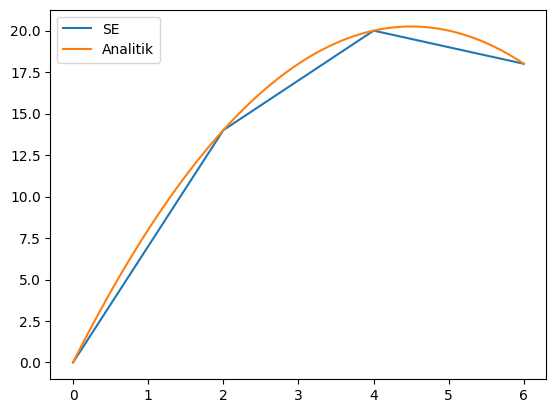

In [8]:
import matplotlib.pyplot as plt

plt.plot(kanat.koordinatlar,u,label='SE')
plt.plot(x_analitik,u_analitik,label='Analitik')
plt.legend()

Görüldüğü üzere sonlu elemanlar yöntemi ile elde ettiğimiz numerik çözüm, analitik çözümle uyum içindedir. Bu sonucu daha fazla eleman kullanarak iyileştirmek mümkündür.

### Çözücüyü Geliştirme

Daha kullanışlı ve kompakt bir kod yapısı için tüm matris ve vektör oluşturma fonksiyonlarımızı tek bir fonksiyon içine alalım:

In [9]:
def çözücü(mesh):
    
    K = K_oluştur(mesh)
    f = f_oluştur(mesh)
    K,f = sınır_uygula(K,f)
    
    u = solve(K,f)
    
    return u

Şimdi daha çok elemana sahip bir ağ için problemimizi tekrar çözelim:

In [10]:
n_eleman2 = 8
kanat2 = BirBoyutluKanat(L,n_eleman2,k,r,Q,g,s)

u2 = çözücü(kanat2) 

Sonuçları grafikte tekrar gösterelim:

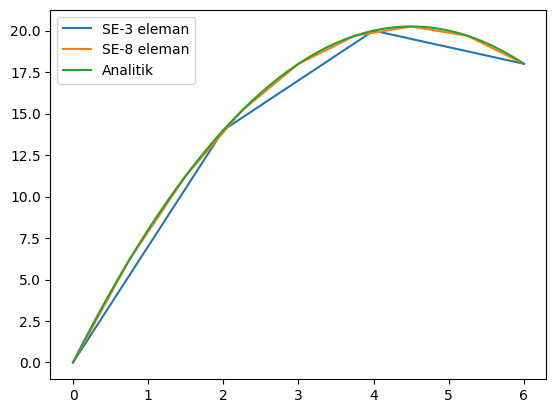

In [12]:
plt.plot(kanat.koordinatlar,u,label='SE-3 eleman')
plt.plot(kanat2.koordinatlar,u2,label='SE-{} eleman'.format(n_eleman2))
plt.plot(x_analitik,u_analitik,label='Analitik')
plt.legend()